# TFCE(-sum)
and comparison to T-sum

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pingouin as pg



In [5]:
df0 = pd.read_csv('../models/sliding_tsums_extended.csv')
df1 = pd.read_csv('../models/sliding_tsums_extended_R1.csv')

# rename tsum to tfcesum in df1
df1.rename(columns={'tsum': 'tfcesum'}, inplace=True)

In [6]:
df0

,tsum,experiment,emc,mac,lpf,hpf,ref,det,base,ar,forking_path
0,2381.972570,ERN,NaN,NaN,20.0,0.1,Cz,NaN,200ms,False,None_None_20_0.1_Cz_None_200ms_False
1,2249.107429,ERN,NaN,NaN,20.0,0.1,Cz,NaN,200ms,int,None_None_20_0.1_Cz_None_200ms_int
2,2302.210620,ERN,NaN,NaN,20.0,0.1,Cz,NaN,200ms,intrej,None_None_20_0.1_Cz_None_200ms_intrej
3,2395.501939,ERN,NaN,NaN,20.0,0.1,Cz,NaN,400ms,False,None_None_20_0.1_Cz_None_400ms_False
4,2277.103682,ERN,NaN,NaN,20.0,0.1,Cz,NaN,400ms,int,None_None_20_0.1_Cz_None_400ms_int
...,...,...,...,...,...,...,...,...,...,...,...
18139,1006.024262,P3,ica,ica,NaN,NaN,average,linear,400ms,int,ica_ica_None_None_average_linear_400ms_int
18140,1018.331042,P3,ica,ica,NaN,NaN,average,linear,400ms,intrej,ica_ica_None_None_average_linear_400ms_intrej
18141,1198.690162,P3,ica,ica,NaN,NaN,average,linear,NaN,False,ica_ica_None_None_average_linear_None_False
18142,1073.645916,P3,ica,ica,NaN,NaN,average,linear,NaN,int,ica_ica_None_None_average_linear_None_int


In [40]:
# merge and show Tsum and TFCEsum correlate

df = pd.merge(df0, df1, on=['forking_path', "experiment", "emc", "mac", "lpf", "hpf", "ref", "det", "base",	"ar"], suffixes=('_R0', '_R1'))
df.head()

,tsum,experiment,emc,mac,lpf,hpf,ref,det,base,ar,forking_path,tfcesum
0,2381.972570,ERN,NaN,NaN,20.0,0.1,Cz,NaN,200ms,False,None_None_20_0.1_Cz_None_200ms_False,470.76
1,2249.107429,ERN,NaN,NaN,20.0,0.1,Cz,NaN,200ms,int,None_None_20_0.1_Cz_None_200ms_int,435.00
2,2302.210620,ERN,NaN,NaN,20.0,0.1,Cz,NaN,200ms,intrej,None_None_20_0.1_Cz_None_200ms_intrej,439.96
3,2395.501939,ERN,NaN,NaN,20.0,0.1,Cz,NaN,400ms,False,None_None_20_0.1_Cz_None_400ms_False,460.24
4,2277.103682,ERN,NaN,NaN,20.0,0.1,Cz,NaN,400ms,int,None_None_20_0.1_Cz_None_400ms_int,435.92


In [44]:
# replace NaN with "None" in all cells
df = df.fillna("None")

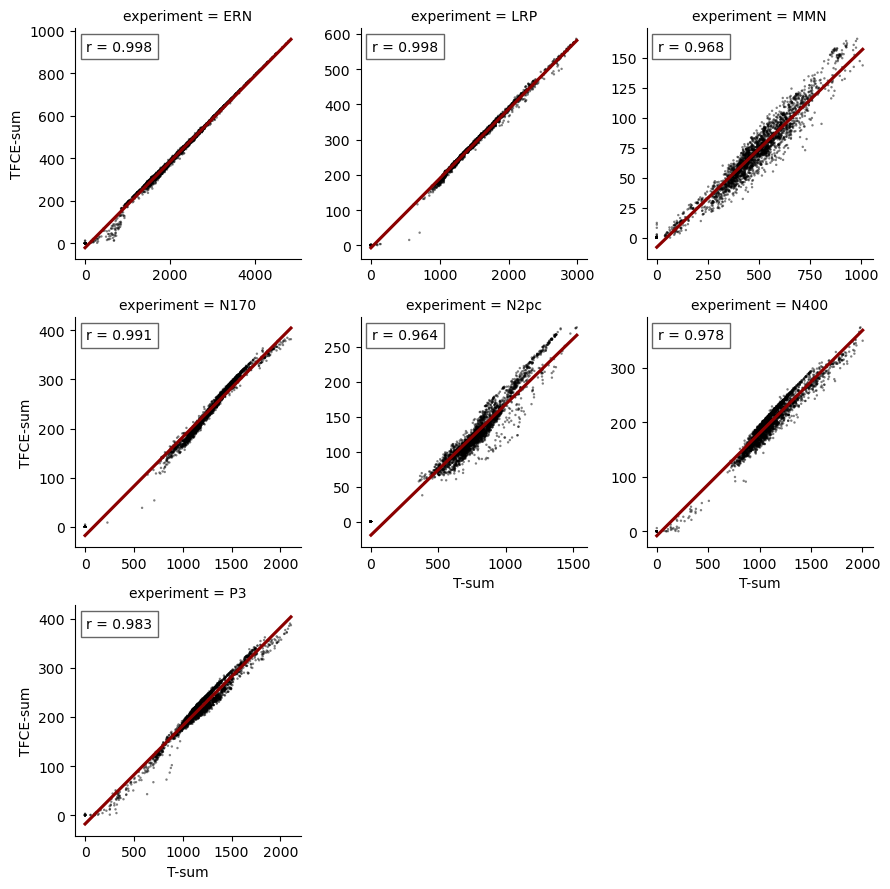

In [49]:
# Function to calculate Pearson correlation and annotate each subplot
def annotate_corr(data, x, y, **kwargs):
    x_vals = data[x]
    y_vals = data[y]

    # Ensure x and y are the same length
    if len(x_vals) != len(y_vals):
        print(f"Warning: Mismatched lengths in facet! {len(x_vals)} vs {len(y_vals)}")

    if len(x_vals) > 1:  # Pearson correlation needs at least 2 points
        r, p = stats.pearsonr(x_vals, y_vals)
        ax = plt.gca()
        # only r values
        ax.text(0.05, 0.95, f"r = {r:.3f}", transform=ax.transAxes, 
                ha="left", va="top", fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
        # with p-values, but data points are dependent, therefore one should use a MLM or so for correct p-values
        #ax.text(0.05, 0.95, f"r = {r:.2f}, p ~ {p:.3f}", transform=ax.transAxes, 
        #        ha="left", va="top", fontsize=10, bbox=dict(facecolor='white', alpha=0.6))   
    else:
        print("Warning: Not enough data for correlation in one facet.")

# Create facet grid with scatterplot and regression line
g = sns.FacetGrid(df, col="experiment", col_wrap=3, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x="tsum", y="tfcesum", 
                #scatter_kws={'alpha': 0.1}
                scatter_kws={'s': 3, 'marker': 'o', 'color': 'black', 'alpha': 0.5,
                             'edgecolors': 'none'},
                line_kws={'color': 'darkred'},                
                
)
g.map_dataframe(annotate_corr, x="tsum", y="tfcesum")  # Fix: x and y are explicitly passed
g.set_axis_labels("T-sum", "TFCE-sum")
plt.savefig('../plots/tsum_vs_tfcesum.png', dpi=300, bbox_inches='tight')
plt.show()